In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 라이브러리 추가
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

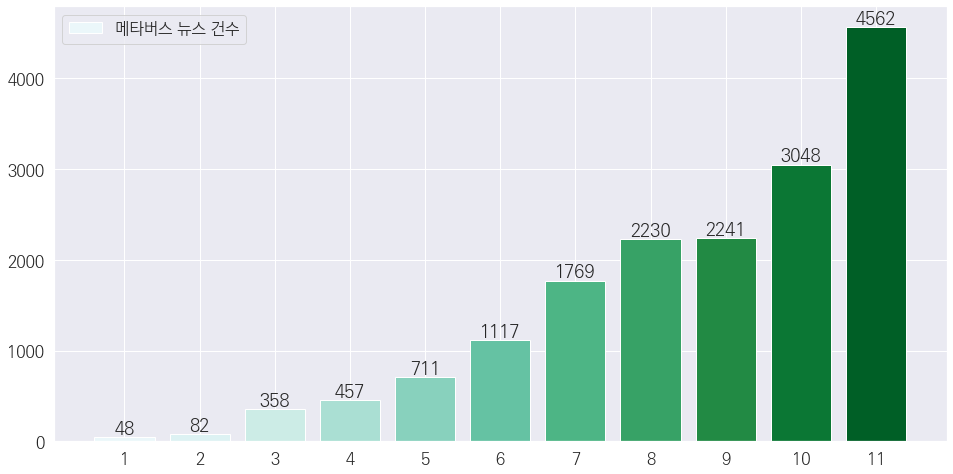

In [3]:
# 메타버스 뉴스 건수
df = pd.read_excel('/Users/charles/git/metaverse/data/bigkinds.xlsx', sheet_name='sheet' ,index_col='일자', parse_dates=True)
df1 = df.groupby(df.index.month).size()
sns.set(style='darkgrid', font='KoPubDotum', font_scale=1.5)
f, ax = plt.subplots(figsize=(16, 8)); plt.xticks(df1.index)
plot = ax.bar(df1.index, df1.values, color=sns.color_palette("BuGn", df1.index.size))
for rect in plot:
              height = rect.get_height()
              ax.text(rect.get_x() + rect.get_width()/2., height, '%d' %int(height), ha='center', va='bottom')
plt.legend(labels=['메타버스 뉴스 건수'], loc='upper left')
plt.savefig('/Users/charles/git/metaverse/image/bigkinds.png', bbox_inches='tight')

In [4]:
print('메타버스 뉴스 ' + str(df1.sum()) + '건')

메타버스 뉴스 16623건


In [5]:
# Komoran 불러오기
from konlpy.tag import Komoran
komoran = Komoran()

In [6]:
# 키워드
df[['키워드']].to_csv('/Users/charles/git/metaverse/data/bigkinds_keywords.txt', index=False, header=False)
f = open("/Users/charles/git/metaverse/data/bigkinds_keywords.txt", 'r', encoding='UTF-8')
lines = f.readlines()
f.close()

In [7]:
# 단어 2차원 리스트
word = []
for i in range(len(lines)):
    word.append(komoran.nouns(lines[i]))
# word = [[y for y in x if not len(y)==1] for x in word]   # 2자 이상 
# word = [[y for y in x if not y.isdigit()] for x in word] # 숫자판별

In [8]:
# 단어 1차원 리스트 함수
def flatten(l):
    flatList = []
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList

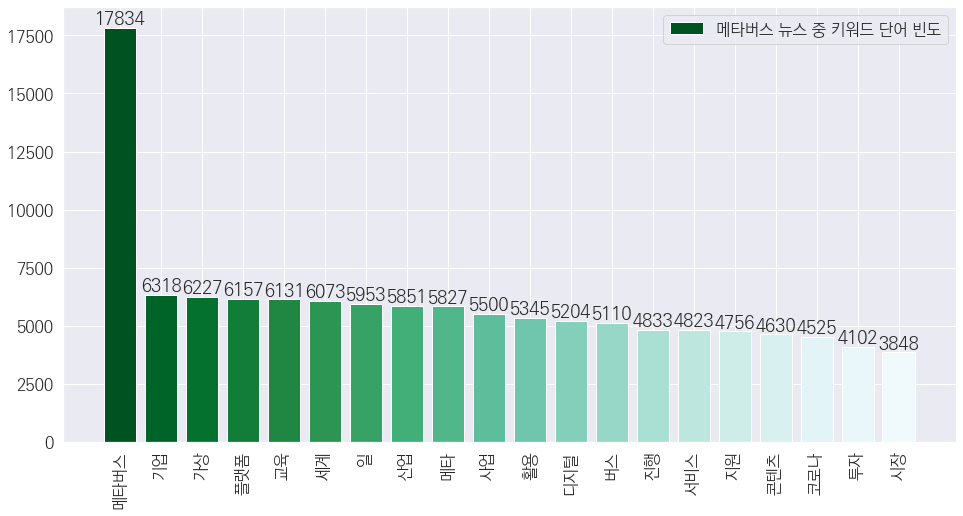

In [9]:
# 단어빈도
df1 = pd.DataFrame({'단어':flatten(word)})
value_counts = df1['단어'].value_counts(dropna=True, sort=True)
df1 = pd.DataFrame(value_counts).reset_index()
df1.columns = ['단어', '빈도']
f, ax = plt.subplots(figsize=(16, 8))
plot = ax.bar(df1[:20]['단어'], df1[:20]['빈도'], color=sns.color_palette("BuGn_r", df1[:20]['단어'].size))
for rect in plot:
              height = rect.get_height()
              ax.text(rect.get_x() + rect.get_width()/2., height, '%d' %int(height), ha='center', va='bottom')
ax.set_xticklabels(df1[:20]['단어'], rotation='vertical') 
plt.legend(labels=['메타버스 뉴스 중 키워드 단어 빈도'], loc='upper right')
plt.savefig('/Users/charles/git/metaverse/image/bigkinds_keywords.png', bbox_inches='tight')

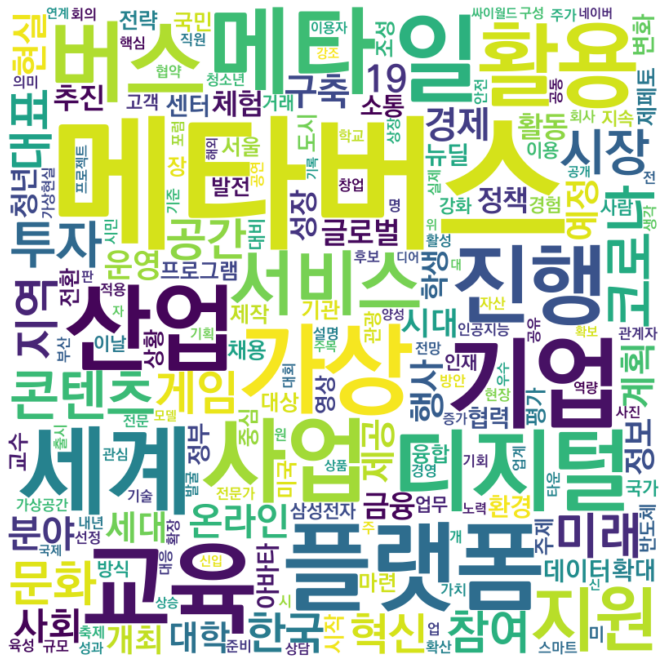

In [10]:
# 키워드 워드클라우드
from wordcloud import WordCloud
from collections import Counter

font_path = '/Users/charles/Library/Fonts/KoPub Dotum Bold.ttf'
wordcloud = WordCloud(font_path=font_path, width=800, height=800, background_color="white")

count = Counter(flatten(word))

wordcloud = wordcloud.generate_from_frequencies(count)
array = wordcloud.to_array()

fig = plt.figure(figsize=(12,12))
plt.imshow(array, interpolation="bilinear")
plt.axis("off")
plt.savefig('/Users/charles/git/metaverse/image/bigkinds_keywords_wordcloud01.png', bbox_inches='tight')
plt.show()

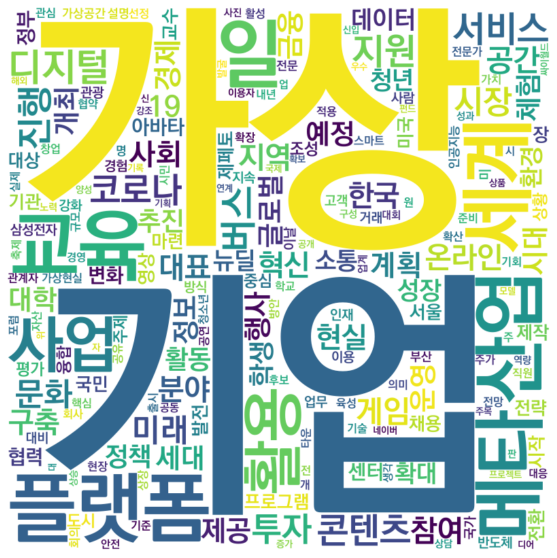

In [11]:
# '메타버스'를 제외한 키워드 워드클라우드
count.pop("메타버스")
wordcloud = wordcloud.generate_from_frequencies(count)
array = wordcloud.to_array()

fig = plt.figure(figsize=(10,10))
plt.imshow(array, interpolation="bilinear")
plt.axis("off")
plt.savefig('/Users/charles/git/metaverse/image/bigkinds_keywords_wordcloud02.png', bbox_inches='tight')
plt.show()

In [12]:
import numpy as np
from PIL import Image

mask = np.array(Image.open("/Users/charles/git/metaverse/image/meta.png"))

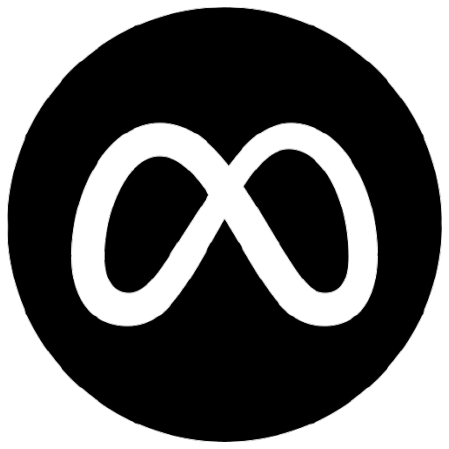

In [13]:
plt.figure(figsize=(8,8))
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
text = open("/Users/charles/git/metaverse/data/bigkinds_keywords.txt").read()
wordcloud = WordCloud().generate(text)

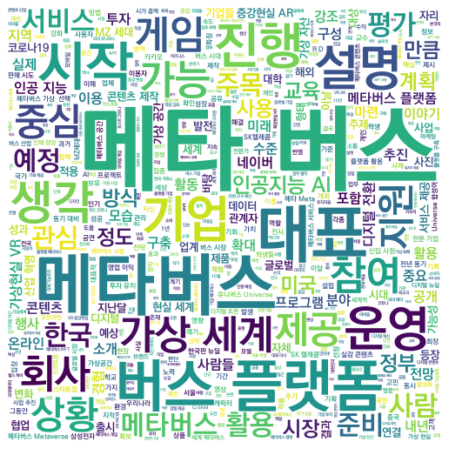

In [15]:
# 키워드 워드클라우드 - meta
stopwords = ''
wc = WordCloud(font_path=font_path,
               max_words=2000,
               background_color="white",
               mask=mask,
               stopwords=stopwords)

wc = wc.generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig('/Users/charles/git/metaverse/image/bigkinds_keywords_wordcloud_meta.png', bbox_inches='tight')
plt.show()